In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [2]:
def getMeshSize(sweepdir):
    cwd = os.getcwd()
    files = np.array(os.listdir(sweepdir))
    sizes = np.zeros(len(files))
    for i, file in enumerate(files): 
        os.chdir(os.path.join(sweepdir, file))
        with open("mesh.log") as file: 
            lines = file.readlines()
            sizes[i] = float(lines[30][10:])
            file.close()
        os.chdir(cwd)
    return files, sizes

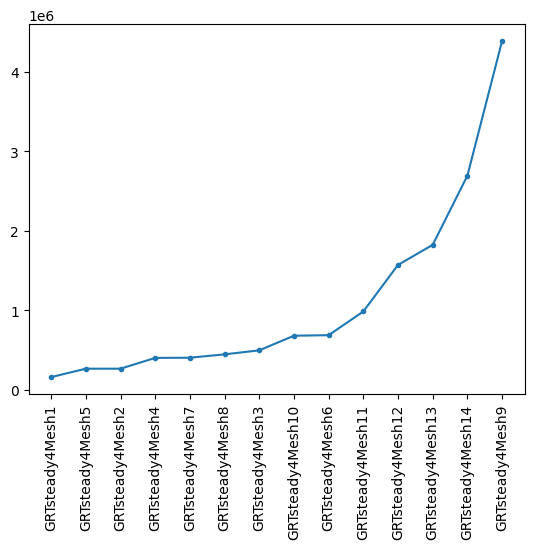

[ 158697.  264533.  264686.  400165.  402708.  444938.  495438.  679411.
  686302.  984253. 1570183. 1822826. 2692342. 4386851.]


In [15]:
files, sizes = getMeshSize("../meshsweep")
plt.plot(sizes[sizes.argsort()], marker=".")
plt.xticks(range(0,len(files)), files[sizes.argsort()], rotation=90)
plt.show()
print(sizes[sizes.argsort()])

In [14]:
numfaces = 2.7e6/15*np.arange(0,16)
setSizeparam = 0.0004+(0.002-0.0004)/15*np.arange(0,16)
print(setSizeparam)

[0.0004     0.00050667 0.00061333 0.00072    0.00082667 0.00093333
 0.00104    0.00114667 0.00125333 0.00136    0.00146667 0.00157333
 0.00168    0.00178667 0.00189333 0.002     ]


In [5]:
def plot_coeffs(sweepdir):
    
    cwd = os.getcwd()
    files = os.listdir(sweepdir)
    coefficients = np.zeros((len(files),3))
    sizes = np.zeros(len(files))
    for i,file in enumerate(sorted(files)): 
        os.chdir(os.path.join(sweepdir, file))
        with open("mesh.log") as file: 
            lines = file.readlines()
            coefficients[i,0] = float(lines[30][10:])
            sizes[i] = float(lines[30][10:])
            file.close()
        coefs = np.loadtxt("postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9 , delimiter="\t")
        coefficients[i,1:] = np.mean(coefs[-175:,2:4], axis=0)
        os.chdir(cwd)
    return sorted(files),sizes, coefficients

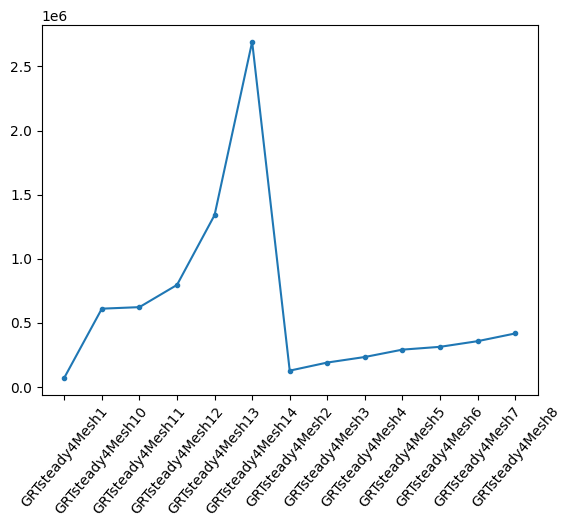

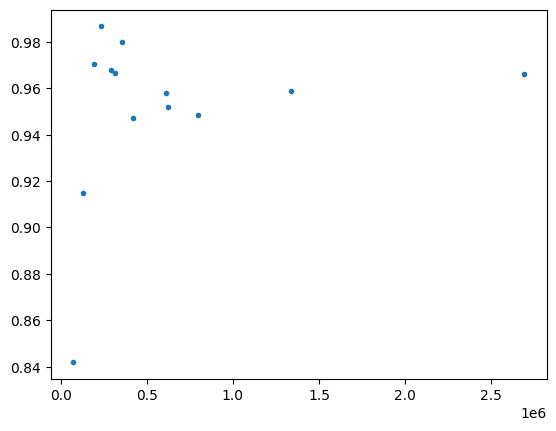

In [6]:
files, sizes, coeffs = plot_coeffs("../meshsweep3000steps")
plt.plot(sizes, marker=".")
plt.xticks(range(0,len(files)), files, rotation=50)
plt.show()
coeffs = coeffs[coeffs[:,0].argsort()]
plt.scatter(coeffs[:,0], coeffs[:,2],marker=".")
plt.show()

In [7]:
coeffs = np.loadtxt("../meshsweep/GRTsteady4Mesh13/"+
                   "postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9, delimiter="\t")
coeff = np.mean(coeffs[-150:], axis=0)
print(coeff[3], coeff[2])
plt.figure(figsize=(6,4), dpi=110)
plt.plot(coeffs[10:,3])
plt.show()
plt.plot(coeffs[10:,2])



FileNotFoundError: ../meshsweep/GRTsteady4Mesh13/postProcessing/forceCoeffs/0/forceCoeffs.dat not found.